In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [31]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-5.0, 10.0), shuffle=True, 
                 random_state=1)


In [32]:
X[0]

array([-2.6570211 , -6.13122494])

In [33]:
X.shape

(500, 2)

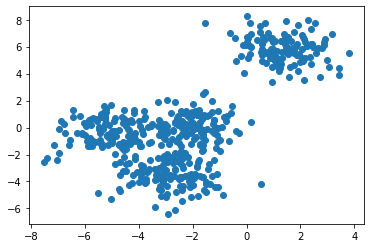

In [34]:
plt.scatter(X[:,0], X[:,1])

In [35]:
km = KMeans(n_clusters=3, init="k-means++", random_state=1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [36]:
km_pred = km.labels_
km_pred

array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

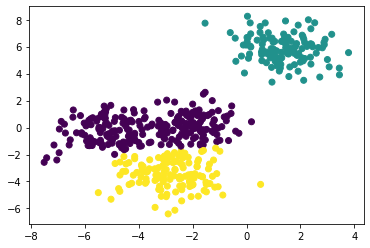

In [37]:
plt.scatter(X[:,0],X[:,1], c=km_pred)

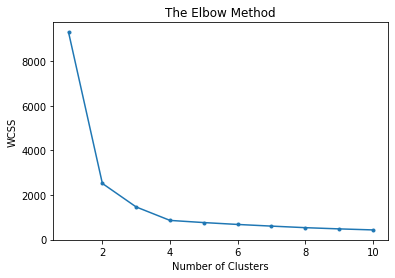

In [38]:
wcss = []
for i in range(1,11):
    KMean = KMeans(n_clusters=i, init="k-means++", random_state=0)
    KMean.fit(X)
    wcss.append(KMean.inertia_)
    
plt.plot(range(1,11), wcss,'.-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()

In [39]:
km = KMeans(n_clusters=4, init="k-means++", random_state=0)
km.fit(X)
labels = km.labels_

In [43]:
cc = km.cluster_centers_
cc

array([[-5.12173358, -0.28995319],
       [ 1.37254976,  5.83355352],
       [-1.99290687,  0.12086128],
       [-2.84721725, -3.53096465]])

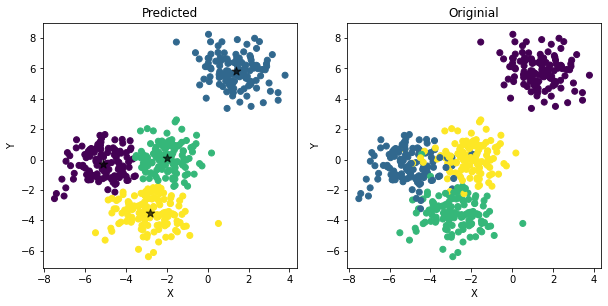

In [60]:
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
plt.title("Predicted")
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.scatter(cc[:,0], cc[:,1], c='black', alpha=0.7, s=80, marker="*")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,2,2)
plt.title("Originial")
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [117]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

In [122]:
def get_km(k, X, y):
    km1 = KMeans(n_clusters=k, init="k-means++", random_state=0)
    km1.fit(X)
    return km1

def get_aic_bic(k, X, y):
    gmm1 = GaussianMixture(n_components=k, init_params="kmeans")
    gmm1.fit(X)
    return gmm1.aic(X), gmm1.bic(X)


0.5649892993972249

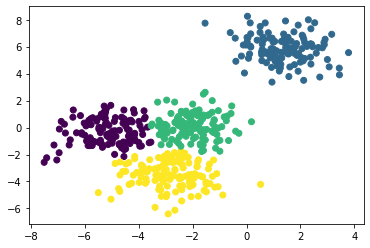

In [119]:
km1 = get_km(4, X, y)
plt.scatter(X[:,0], X[:,1], c= km1.labels_)
silhouette_score(X, km.labels_)

In [92]:
aic = []
bic = []
for k in range(1,11):
    a, b = get_aic_bic(k, X, y)
    aic.append(a)
    bic.append(b)
    print(k,a,b)
    


1 4713.212727288475 4734.285767780586
2 4219.6793183614 4266.040007444044
3 4096.769597314227 4168.417934987404
4 4055.098401805997 4152.034388069707
5 4060.2903246408755 4182.513959495119
6 4072.1015768340835 4219.61286027886
7 4069.83864837126 4242.63758040657
8 4085.7458080894908 4283.832388715334
9 4105.344025816276 4328.718255032652
10 4097.252948162617 4345.914825969527


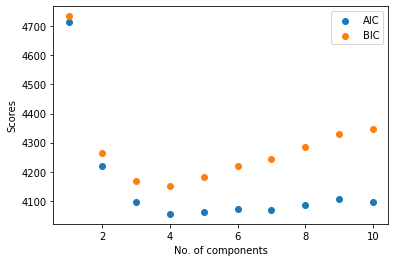

In [106]:
plt.scatter(range(1,11), aic, marker='o', label="AIC")
plt.scatter(range(1,11), bic, label="BIC")
plt.xlabel("No. of components")
plt.ylabel("Scores")
plt.legend()
plt.show()

The meaning of the scores.

* BIC lower is better

* AIC lower is better

* silhouette higher is better

* davies lower is better

* homogeneity higher is better

* completeness higher is better

* v-measure higher is better

* calinski higher is better

In [131]:
def get_score(k, X, y):
    km1 = get_km(k, X, y)
    aic, bic = get_aic_bic(k, X, y)
    y_pred = km1.predict(X)
    sil = silhouette_score(X, y_pred)
    dav = davies_bouldin_score(X, y_pred)
    hom = homogeneity_score(y, y_pred)
    com = completeness_score(y, y_pred)
    vms = v_measure_score(y, y_pred)
    cal = calinski_harabasz_score(X, y_pred)
    return k, aic, bic, sil, dav, hom, com, vms, cal

In [133]:
import pandas as pd

df = pd.DataFrame([get_score(k, X, y) for k in range(2,11)],columns=['k', 'AIC', 'BIC', 'silhouette',
                           'davies', 'homogeneity',
                           'completeness', 'vmeasure', 'calinski'])
df

,k,AIC,BIC,silhouette,davies,homogeneity,completeness,vmeasure,calinski
0,2,4219.679318,4266.040007,0.672261,0.409407,0.405639,1.000000,0.577160,1342.701058
1,3,4096.769597,4168.417935,0.521373,0.720855,0.678497,0.894752,0.771761,1334.278307
2,4,4055.098402,4152.034388,0.564989,0.586409,0.867401,0.867520,0.867460,1628.580553
3,5,4064.834760,4187.058395,0.509786,0.764428,0.847585,0.748543,0.794991,1390.984965
4,6,4078.571387,4226.082670,0.403577,0.985261,0.863910,0.688950,0.766574,1261.193343
5,7,4085.624586,4258.423518,0.366621,1.060811,0.873751,0.634147,0.734912,1189.053573
6,8,4075.746466,4273.833047,0.333886,1.067585,0.848764,0.568188,0.680697,1160.586383
7,9,4096.913091,4320.287321,0.353898,0.927573,0.832356,0.531220,0.648537,1136.516666
8,10,4104.347981,4353.009859,0.352632,0.906620,0.847088,0.516522,0.641737,1122.217534


In [107]:
gmm = GaussianMixture(n_components=4, init_params="kmeans")
gmm.fit(X)
gmm.bic(X), gmm.aic(X)

(4152.034388069707, 4055.098401805997)

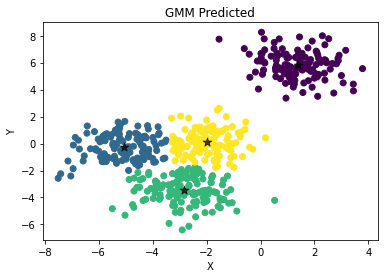

In [108]:
gmm_labels = gmm.predict(X)
gmm_centres = gmm.means_
plt.title("GMM Predicted")
plt.scatter(X[:,0], X[:,1], c=gmm_labels, cmap="viridis")
plt.scatter(gmm_centres[:,0], gmm_centres[:,1], c='black', alpha=0.7, s=80, marker="*")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()